In [1]:
import numpy as np

In [2]:
#UNTUK NILAI IMPOR
class Neural_Network(object):
    def __init__(self):
        #parameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8

        #weights
        self.W1 = np.random.randn(self.inputLayerSize,\
                                 self.hiddenLayerSize)  
        self.W2 = np.random.randn(self.hiddenLayerSize,\
                                 self.outputLayerSize)  
    
    def printw(self):
        return self.W1
        
    def weight(self, W1, W2):
        #Make an internal variable for the weight:
        self.W1 = W1
        self.W2 = W2
        
    def forward(self, X):
        #forward propagation through our network
        self.z2 = np.dot(X,self.W1)  
        self.a2 = self.tanh(self.z2)  # activation function
        self.z3 = np.dot(self.a2, self.W2) 
        yHat = self.tanh(self.z3)  # final activation function
        return yHat

    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self,X,y):
        self.yHat=self.forward(X)
        
        delta3=np.multiply(-(y-self.yHat),self.tanhPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.tanhPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    def getParams(self):
        params=np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    
    def setParams(self,params):
        W1_start=0
        W1_end=self.hiddenLayerSize*self.inputLayerSize
        self.W1=np.reshape(params[W1_start:W1_end],\
                          (self.inputLayerSize,self.hiddenLayerSize))
        W2_end=W1_end+self.hiddenLayerSize*self.outputLayerSize
        self.W2=np.reshape(params[W1_end:W2_end],\
                          (self.hiddenLayerSize,self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
NN = Neural_Network()

In [4]:
NN.W1

array([[-0.67345161,  0.23912847, -1.95738286,  0.78798576, -0.81804511,
         0.17248482, -0.80099598,  1.00818092],
       [ 0.24008648, -0.15920058,  1.10704155,  1.43533169, -0.31925034,
         0.04239635,  1.1829591 , -0.2957892 ],
       [-0.26362563,  0.89928161,  0.02509872, -0.96466927,  1.15209284,
        -1.02186059,  0.56524964,  1.34863968],
       [ 0.72904568,  0.29038178, -0.42278036, -1.26182066, -0.17850053,
        -0.65625626,  1.35165658, -2.19067814],
       [ 0.41481766,  0.32297146,  0.77264952,  1.83577358,  1.65186467,
         1.87923372, -0.89211014, -0.53680597]])

In [5]:
NN.W2

array([[ 0.88127918],
       [-0.86380677],
       [-0.45837561],
       [ 0.48831652],
       [-2.20197196],
       [-0.33627471],
       [-0.79587644],
       [ 0.96346531]])

In [6]:
#NILAI IMPOR
X=np.array(([	0.147887324	,	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	]	,
[	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	]	,
[	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	]	,
[	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	]	,
[	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	]	,
[	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	]	,
[	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	]	,
[	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	]	,
[	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	]	,
[	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	]	,
[	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	]	,
[	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	,	0	]	,
[	0.676056338	,	0.253521127	,	0.450704225	,	0	,	0.485915493	]	,
[	0.253521127	,	0.450704225	,	0	,	0.485915493	,	0.781690141	]	,
[	0.450704225	,	0	,	0.485915493	,	0.781690141	,	0.802816901	]	,
[	0	,	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	]	,
[	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	]	,
[	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	]	,
[	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	]	,
[	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	]	,
[	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	,	1	]	,
[	0.415492958	,	0.647887324	,	0.612676056	,	1	,	0.478873239	]	,
[	0.647887324	,	0.612676056	,	1	,	0.478873239	,	0.302816901	]	,
[	0.612676056	,	1	,	0.478873239	,	0.302816901	,	0.38028169	]	,
[	1	,	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	]	,
[	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	]	,
[	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	]	,
[	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	]	,
[	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	]	,
[	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	]	,
[	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	]	,
[	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	]	,
[	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	]	,
[	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	]	,
[	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	]	,
[	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	]	,
[	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	]	,
[	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	]	,
[	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	]	,
[	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	]	,
[	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	]	,
[	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	]	,
[	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	]	,
[	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	]	,
[	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	]	,
[	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	]	,
[	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	]	,
[	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	]	,
[	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	]	,
[	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	]	,
[	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	]	,
[	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	]	,
[	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	]	,
[	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	]	,
[	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	]	,
[	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	]	,
[	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	]	,

)           
,dtype=float)
y=np.array(([	0.697183099	]	,
[	0.971830986	]	,
[	0.591549296	]	,
[	0.281690141	]	,
[	0.26056338	]	,
[	0.464788732	]	,
[	0.992957746	]	,
[	0.676056338	]	,
[	0.253521127	]	,
[	0.450704225	]	,
[	0	]	,
[	0.485915493	]	,
[	0.781690141	]	,
[	0.802816901	]	,
[	0.302816901	]	,
[	0.471830986	]	,
[	0.415492958	]	,
[	0.647887324	]	,
[	0.612676056	]	,
[	1	]	,
[	0.478873239	]	,
[	0.302816901	]	,
[	0.38028169	]	,
[	0.591549296	]	,
[	0.802816901	]	,
[	0.471830986	]	,
[	0.267605634	]	,
[	0.408450704	]	,
[	0.323943662	]	,
[	0.457746479	]	,
[	0.816901408	]	,
[	0.753521127	]	,
[	0.436619718	]	,
[	0.457746479	]	,
[	0.387323944	]	,
[	0.464788732	]	,
[	0.732394366	]	,
[	0.514084507	]	,
[	0.281690141	]	,
[	0.190140845	]	,
[	0.514084507	]	,
[	0.507042254	]	,
[	0.753521127	]	,
[	0.542253521	]	,
[	0.26056338	]	,
[	0.394366197	]	,
[	0.626760563	]	,
[	0.795774648	]	,
[	0.704225352	]	,
[	0.535211268	]	,
[	0.401408451	]	,
[	0.126760563	]	,
[	0.330985915	]	,
[	0.415492958	]	,
[	0.556338028	]	,
[	0.591549296	]	,
[	0.514084507	]	,

)
,dtype=float)

dataprediksi = np.array(([	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	]	,
[	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	]	,
[	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	]	,
[	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	]	,


), dtype=float)


In [7]:
import matplotlib.pyplot as plot

In [8]:
from scipy import optimize

In [9]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [10]:
NN=Neural_Network()

In [11]:
T = trainer(NN)

In [12]:
#Train network with new data:
T = trainer(NN)
T.train(X,y)

         Current function value: 0.331554
         Iterations: 100
         Function evaluations: 126
         Gradient evaluations: 126


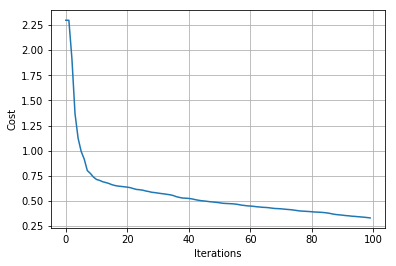

In [13]:
#Plot cost during training:
plot.plot(T.J)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.show()

In [14]:
#Training Data:
trainX = np.array(([	0.147887324	,	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	]	,
[	0.063380282	,	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	]	,
[	0.436619718	,	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	]	,
[	0.570422535	,	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	]	,
[	0.669014085	,	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	]	,
[	0.697183099	,	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	]	,
[	0.971830986	,	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	]	,
[	0.591549296	,	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	]	,
[	0.281690141	,	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	]	,
[	0.26056338	,	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	]	,
[	0.464788732	,	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	]	,
[	0.992957746	,	0.676056338	,	0.253521127	,	0.450704225	,	0	]	,
[	0.676056338	,	0.253521127	,	0.450704225	,	0	,	0.485915493	]	,
[	0.253521127	,	0.450704225	,	0	,	0.485915493	,	0.781690141	]	,
[	0.450704225	,	0	,	0.485915493	,	0.781690141	,	0.802816901	]	,
[	0	,	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	]	,
[	0.485915493	,	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	]	,
[	0.781690141	,	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	]	,
[	0.802816901	,	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	]	,
[	0.302816901	,	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	]	,
[	0.471830986	,	0.415492958	,	0.647887324	,	0.612676056	,	1	]	,
[	0.415492958	,	0.647887324	,	0.612676056	,	1	,	0.478873239	]	,
[	0.647887324	,	0.612676056	,	1	,	0.478873239	,	0.302816901	]	,
[	0.612676056	,	1	,	0.478873239	,	0.302816901	,	0.38028169	]	,
[	1	,	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	]	,
[	0.478873239	,	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	]	,
[	0.302816901	,	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	]	,
[	0.38028169	,	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	]	,
[	0.591549296	,	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	]	,
[	0.802816901	,	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	]	,
[	0.471830986	,	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	]	,
[	0.267605634	,	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	]	,
[	0.408450704	,	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	]	,
[	0.323943662	,	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	]	,
[	0.457746479	,	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	]	,
[	0.816901408	,	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	]	,
[	0.753521127	,	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	]	,
[	0.436619718	,	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	]	,
[	0.457746479	,	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	]	,
[	0.387323944	,	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	]	,
[	0.464788732	,	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	]	,
[	0.732394366	,	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	]	,
[	0.514084507	,	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	]	,
[	0.281690141	,	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	]	,
[	0.190140845	,	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	]	,

)
, dtype=float)
trainY = np.array(([	0.697183099	]	,
[	0.971830986	]	,
[	0.591549296	]	,
[	0.281690141	]	,
[	0.26056338	]	,
[	0.464788732	]	,
[	0.992957746	]	,
[	0.676056338	]	,
[	0.253521127	]	,
[	0.450704225	]	,
[	0	]	,
[	0.485915493	]	,
[	0.781690141	]	,
[	0.802816901	]	,
[	0.302816901	]	,
[	0.471830986	]	,
[	0.415492958	]	,
[	0.647887324	]	,
[	0.612676056	]	,
[	1	]	,
[	0.478873239	]	,
[	0.302816901	]	,
[	0.38028169	]	,
[	0.591549296	]	,
[	0.802816901	]	,
[	0.471830986	]	,
[	0.267605634	]	,
[	0.408450704	]	,
[	0.323943662	]	,
[	0.457746479	]	,
[	0.816901408	]	,
[	0.753521127	]	,
[	0.436619718	]	,
[	0.457746479	]	,
[	0.387323944	]	,
[	0.464788732	]	,
[	0.732394366	]	,
[	0.514084507	]	,
[	0.281690141	]	,
[	0.190140845	]	,
[	0.514084507	]	,
[	0.507042254	]	,
[	0.753521127	]	,
[	0.542253521	]	,
[	0.26056338	]	,

)
, dtype=float)

#Testing Data:
testX = np.array(([	0.514084507	,	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	]	,
[	0.507042254	,	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	]	,
[	0.753521127	,	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	]	,
[	0.542253521	,	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	]	,
[	0.26056338	,	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	]	,
[	0.394366197	,	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	]	,
[	0.626760563	,	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	]	,
[	0.795774648	,	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	]	,
[	0.704225352	,	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	]	,
[	0.535211268	,	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	]	,
[	0.401408451	,	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	]	,
[	0.126760563	,	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	]	,

)
, dtype=float)
testY = np.array(([	0.394366197	]	,
[	0.626760563	]	,
[	0.795774648	]	,
[	0.704225352	]	,
[	0.535211268	]	,
[	0.401408451	]	,
[	0.126760563	]	,
[	0.330985915	]	,
[	0.415492958	]	,
[	0.556338028	]	,
[	0.591549296	]	,
[	0.514084507	]	,

)
, dtype=float)


dataprediksi = np.array(([	0.330985915	,	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	]	,
[	0.415492958	,	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	]	,
[	0.556338028	,	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	]	,
[	0.591549296	,	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	]	,


), dtype=float)

In [15]:
testX

array([[0.51408451, 0.50704225, 0.75352113, 0.54225352, 0.26056338],
       [0.50704225, 0.75352113, 0.54225352, 0.26056338, 0.3943662 ],
       [0.75352113, 0.54225352, 0.26056338, 0.3943662 , 0.62676056],
       [0.54225352, 0.26056338, 0.3943662 , 0.62676056, 0.79577465],
       [0.26056338, 0.3943662 , 0.62676056, 0.79577465, 0.70422535],
       [0.3943662 , 0.62676056, 0.79577465, 0.70422535, 0.53521127],
       [0.62676056, 0.79577465, 0.70422535, 0.53521127, 0.40140845],
       [0.79577465, 0.70422535, 0.53521127, 0.40140845, 0.12676056],
       [0.70422535, 0.53521127, 0.40140845, 0.12676056, 0.33098592],
       [0.53521127, 0.40140845, 0.12676056, 0.33098592, 0.41549296],
       [0.40140845, 0.12676056, 0.33098592, 0.41549296, 0.55633803],
       [0.12676056, 0.33098592, 0.41549296, 0.55633803, 0.5915493 ]])

In [16]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [17]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 6.355508
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3


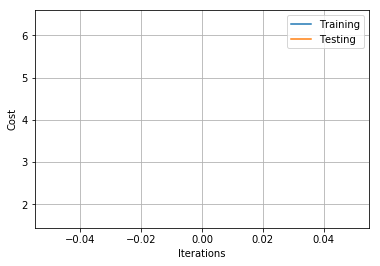

In [18]:
#Plot cost during training:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [19]:
T.J

[array([6.35550814])]

In [20]:
T.testJ

[array([1.68059371])]

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

4.674914428109271

In [22]:
yHat = NN.forward(X)

In [23]:
yHat

array([[0.99999998],
       [0.99999999],
       [1.        ],
       [0.99999999],
       [0.99999991],
       [0.99999987],
       [0.99999992],
       [1.        ],
       [0.99999999],
       [0.99999992],
       [0.99999992],
       [0.99999881],
       [0.99999987],
       [0.99999998],
       [0.99999999],
       [0.99999991],
       [0.99999993],
       [0.99999995],
       [0.99999998],
       [0.99999999],
       [1.        ],
       [0.99999999],
       [0.99999989],
       [0.9999999 ],
       [0.99999997],
       [0.99999999],
       [0.99999998],
       [0.99999991],
       [0.99999991],
       [0.99999992],
       [0.99999996],
       [0.99999999],
       [0.99999999],
       [0.99999998],
       [0.99999995],
       [0.99999994],
       [0.99999996],
       [0.99999999],
       [0.99999999],
       [0.99999993],
       [0.99999977],
       [0.99999993],
       [0.99999997],
       [0.99999999],
       [0.99999999],
       [0.99999992],
       [0.99999991],
       [0.999

In [24]:
y

array([[0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.795

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.2819684858240404

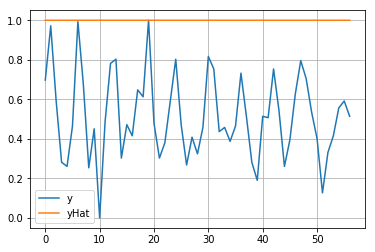

In [26]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [27]:
#Regularization Parameter:
Lambda = 0.0001

In [28]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [29]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 5
        self.outputLayerSize = 1
        self.hiddenLayerSize = 8
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.tanh(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.tanh(self.z3) 
        return yHat
        
    def tanh(self, z):
        # activation function
        return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    
    def tanhPrime(self,z): 
        #derivative of tanh
        return 1-((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))**2
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.tanhPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.tanhPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [30]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [31]:
NN = Neural_Network(Lambda=0.0001)

In [32]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [33]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.3677474920670848e-08

In [34]:
T = trainer(NN)

In [35]:
T.train(X,y,testX,testY)

         Current function value: 0.010882
         Iterations: 100
         Function evaluations: 122
         Gradient evaluations: 122


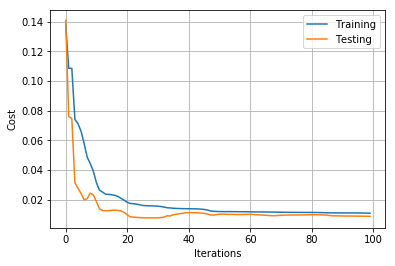

In [36]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [37]:
T.J

[array([0.13810815]),
 array([0.10848689]),
 array([0.10845882]),
 array([0.07407332]),
 array([0.07125047]),
 array([0.06612268]),
 array([0.05789715]),
 array([0.04869656]),
 array([0.04432044]),
 array([0.03921112]),
 array([0.03145104]),
 array([0.02644069]),
 array([0.02513051]),
 array([0.02370879]),
 array([0.02357228]),
 array([0.02333536]),
 array([0.02290733]),
 array([0.02215364]),
 array([0.02098369]),
 array([0.0196792]),
 array([0.01829832]),
 array([0.01750228]),
 array([0.01728602]),
 array([0.01703459]),
 array([0.01663489]),
 array([0.01615411]),
 array([0.01595321]),
 array([0.01588735]),
 array([0.0158402]),
 array([0.01576123]),
 array([0.01562616]),
 array([0.01539915]),
 array([0.01503745]),
 array([0.01458492]),
 array([0.0144418]),
 array([0.01425347]),
 array([0.01411674]),
 array([0.01404402]),
 array([0.01397516]),
 array([0.01394217]),
 array([0.01390244]),
 array([0.01388038]),
 array([0.01384119]),
 array([0.01377191]),
 array([0.01365159]),
 array([0.013

In [38]:
T.testJ

[array([0.14085818]),
 array([0.07605206]),
 array([0.0747396]),
 array([0.03139395]),
 array([0.02776483]),
 array([0.02422557]),
 array([0.0199921]),
 array([0.02069537]),
 array([0.0244091]),
 array([0.02326825]),
 array([0.01869267]),
 array([0.0138589]),
 array([0.01273174]),
 array([0.01247119]),
 array([0.01270508]),
 array([0.0128806]),
 array([0.01293873]),
 array([0.01279388]),
 array([0.0123425]),
 array([0.01152312]),
 array([0.0099094]),
 array([0.00849219]),
 array([0.00828128]),
 array([0.00812477]),
 array([0.00796932]),
 array([0.00783899]),
 array([0.00773522]),
 array([0.00776932]),
 array([0.0077484]),
 array([0.00775168]),
 array([0.0077683]),
 array([0.00795611]),
 array([0.00832726]),
 array([0.00917244]),
 array([0.00904214]),
 array([0.00987917]),
 array([0.01020963]),
 array([0.01056986]),
 array([0.01084078]),
 array([0.0111704]),
 array([0.01126144]),
 array([0.01127996]),
 array([0.01124223]),
 array([0.01116015]),
 array([0.01102153]),
 array([0.01081396])

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.006615738217526923

In [40]:
yHat=NN.forward(X)

In [41]:
yHat

array([[0.59162095],
       [0.74671371],
       [0.56259386],
       [0.22401756],
       [0.25449611],
       [0.33635684],
       [0.75543666],
       [0.71445342],
       [0.28251568],
       [0.36452377],
       [0.24341543],
       [0.45121766],
       [0.69104675],
       [0.78275426],
       [0.3171454 ],
       [0.4289236 ],
       [0.3642845 ],
       [0.61774972],
       [0.64234102],
       [0.56644945],
       [0.60473058],
       [0.2076324 ],
       [0.35872634],
       [0.3642698 ],
       [0.77351004],
       [0.61625402],
       [0.33824169],
       [0.40683537],
       [0.4693306 ],
       [0.63875728],
       [0.58348208],
       [0.73340686],
       [0.48710489],
       [0.37237561],
       [0.31407304],
       [0.55482498],
       [0.60467052],
       [0.63579059],
       [0.40453874],
       [0.41359094],
       [0.42019657],
       [0.7114308 ],
       [0.59227587],
       [0.66871556],
       [0.52314346],
       [0.35974083],
       [0.44560895],
       [0.718

In [42]:
y

array([[0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.795

In [43]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.01900151224916925

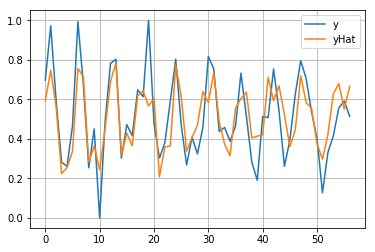

In [44]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [45]:
prediksi=NN.forward(dataprediksi)

In [46]:
prediksi

array([[0.50880022],
       [0.44120999],
       [0.48928882],
       [0.56043372]])

In [47]:
from sklearn.metrics import mean_squared_error 

In [48]:
Y_true= ([	0.387323944	]	,
[	0.373239437	]	,
[	0.366197183	]	,
[	0.443661972	]	,
)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.012040918834985908

In [49]:
dataprediksi

array([[0.33098592, 0.41549296, 0.55633803, 0.5915493 , 0.51408451],
       [0.41549296, 0.55633803, 0.5915493 , 0.51408451, 0.38732394],
       [0.55633803, 0.5915493 , 0.51408451, 0.38732394, 0.37323944],
       [0.5915493 , 0.51408451, 0.38732394, 0.37323944, 0.36619718]])

In [50]:
a=np.array([	0.514084507	,	0.387323944	,	0.373239437	,	0.366197183	,	0.443661972	])

In [51]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.58467037])

In [52]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.61459097])

In [53]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.55821063])

In [54]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.50248587])

In [55]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.4446128])

In [56]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.45070177])